In [22]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Housing.csv')

In [4]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
print(df['furnishingstatus'].unique())

['furnished' 'semi-furnished' 'unfurnished']


In [12]:
df.replace({'no':0,'yes':1,'unfurnished':0,'semi-furnished':1,'furnished':2}, inplace=True)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

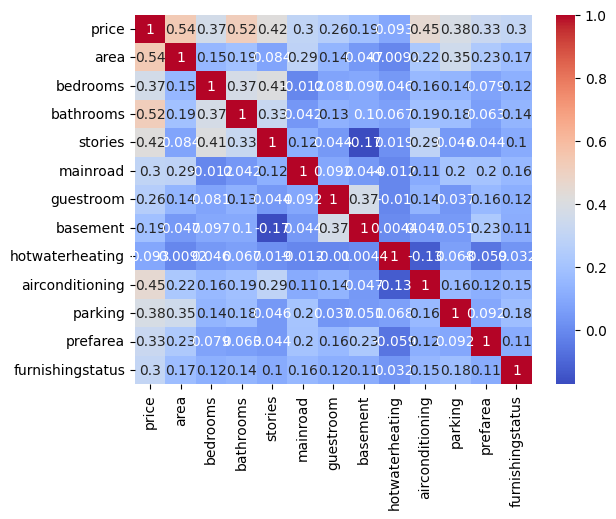

In [18]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['area', 'bathrooms', 'stories', 'airconditioning']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


MSE: 2268833259992.011
R2 Score: 0.5511323120643126
           Feature   Coefficient
0             area  3.179245e+02
1        bathrooms  1.254151e+06
2          stories  3.839735e+05
3  airconditioning  9.568831e+05


C:\Users\rpkpa\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


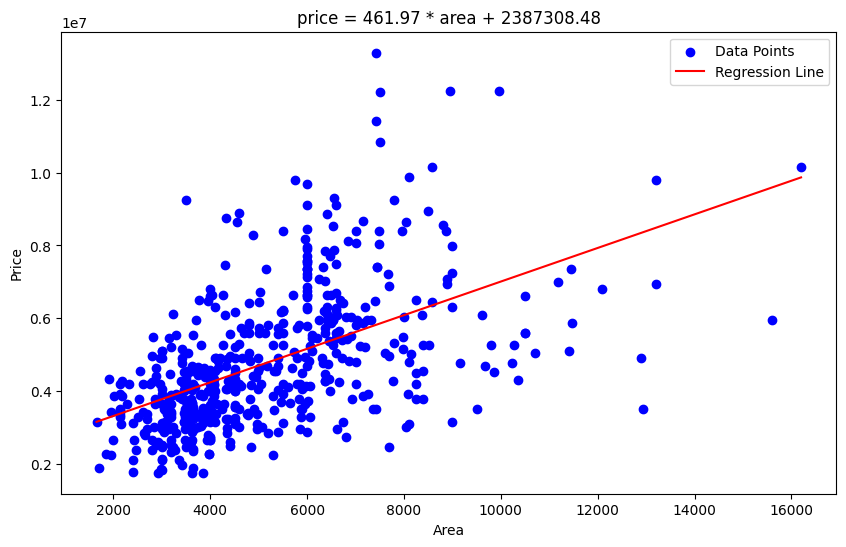

In [26]:
X_simple = df[['area']]
y = df['price']

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_simple['area'], y, color='blue', label='Data Points')

x_vals = np.linspace(X_simple['area'].min(), X_simple['area'].max(), 100).reshape(-1, 1)
y_vals = model_simple.predict(x_vals)

plt.plot(x_vals, y_vals, color='red', label='Regression Line')

slope = model_simple.coef_[0]
intercept = model_simple.intercept_
plt.title(f'price = {slope:.2f} * area + {intercept:.2f}')

plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
